# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import MSTL

## Data Inspection and Sanity Checks

In [2]:
df = pd.read_csv("../data/player_counts.csv", parse_dates=["Timestamp"])
df

,Timestamp,Peak Player Count
0,2017-02-17 06:00:00,9234.0
1,2017-02-17 07:00:00,10005.0
2,2017-02-17 08:00:00,11323.0
3,2017-02-17 09:00:00,12830.0
4,2017-02-17 10:00:00,14407.0
...,...,...
72517,2025-05-27 19:00:00,33854.0
72518,2025-05-27 20:00:00,36722.0
72519,2025-05-27 21:00:00,36204.0
72520,2025-05-27 22:00:00,32911.0


In [3]:
df.loc[df["Peak Player Count"].isnull()]

,Timestamp,Peak Player Count
995,2017-03-30 17:00:00,NaN
1211,2017-04-08 17:00:00,NaN
1304,2017-04-12 14:00:00,NaN
7306,2017-12-18 16:00:00,NaN
7307,2017-12-18 17:00:00,NaN
...,...,...
56263,2023-07-20 13:00:00,NaN
56264,2023-07-20 14:00:00,NaN
56265,2023-07-20 15:00:00,NaN
64386,2024-06-23 00:00:00,NaN


In [4]:
null_pct = df["Peak Player Count"].isnull().mean() * 100
print(f"Null percentage: {null_pct:.2f}%")

Null percentage: 0.30%


## Basic Plots

In [5]:
fig = px.line(df, x="Timestamp", y="Peak Player Count", title="Peak Hourly Player Count Over Time")
fig

## Trend and Seasonality

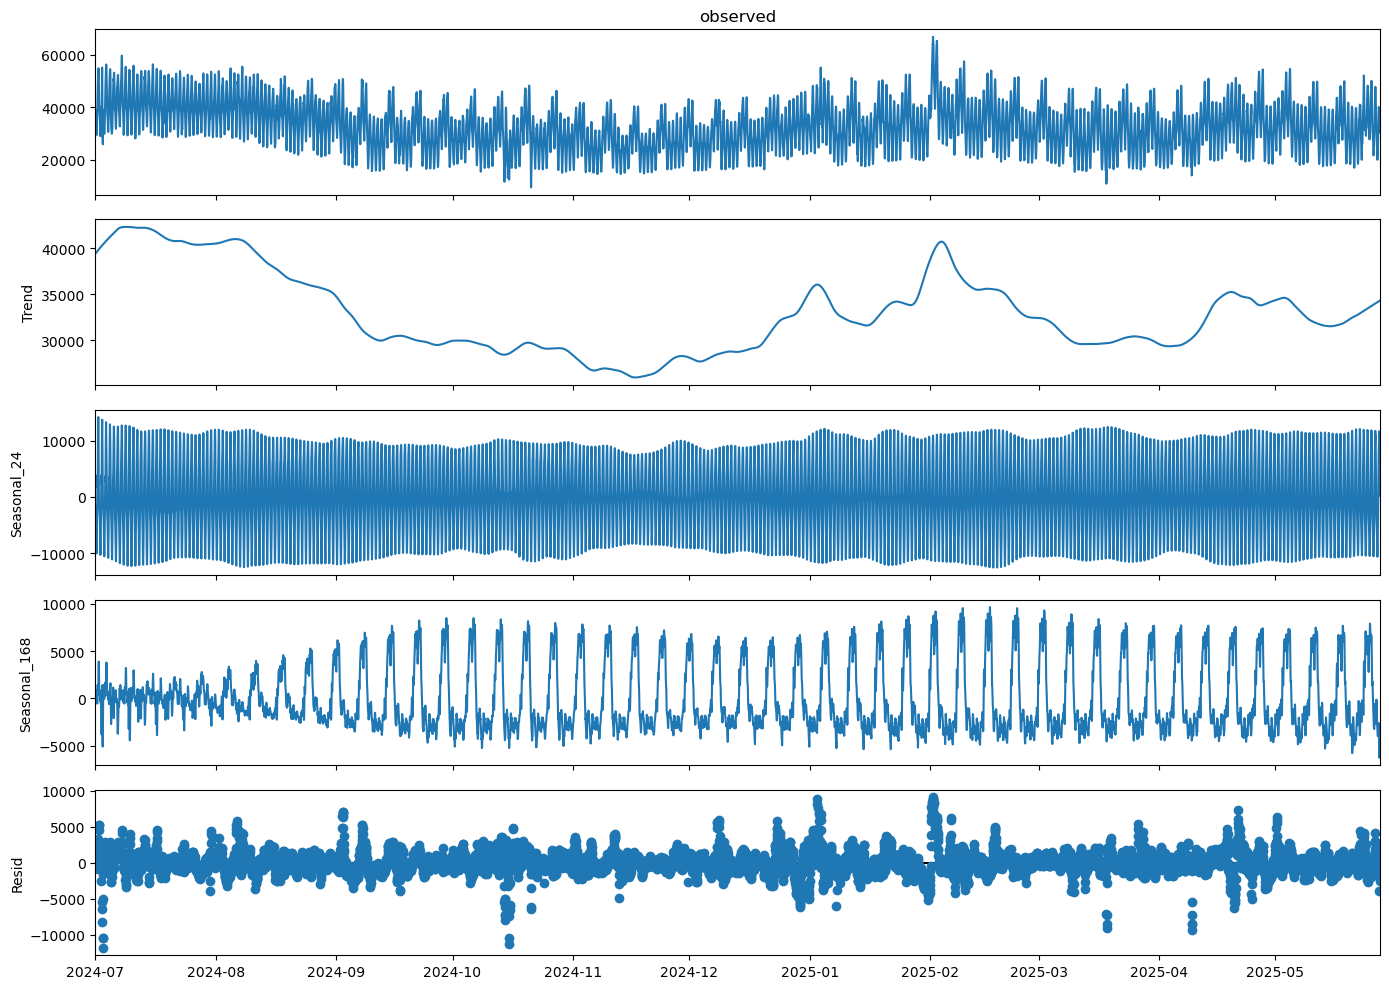

In [6]:
# First do on subset without nulls
df_ts = df.loc[df["Timestamp"] >= "2024-07-01"].set_index("Timestamp")
res = MSTL(df_ts["Peak Player Count"], periods=(24, 24 * 7)).fit()
fig = res.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

In [7]:
# Try repeating but impute

## Notes

- Hypixel was DDOS'd around June 18-19, 2021, leading to downtime. This was cross-referenced with Hypixel forums.
- Very good coverage, only missing about 0.3% of the data.
- Clear daily and weekly patterns, monthly isn't as clear and may not be as useful.
- Broader yearly trend is also visible, weekly pattern flattens out during summer months.
- A few outliers, might be from maintenance or special events.